1. Download the dataset
2. Import the required libraries

In [314]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [315]:
df=pd.read_csv('seeds.csv')


# 1. Data Visualization and Exploration

### 1-Print 2 rows

In [316]:
df.head(2)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


### 2- chaeck impalensed class

<AxesSubplot:title={'center':'target'}>

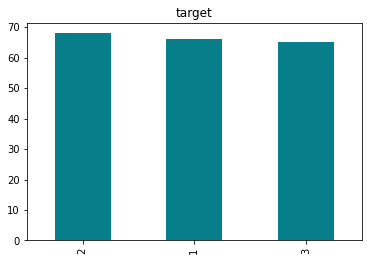

In [317]:
df['Type'].value_counts().plot(kind='bar', title='target',color='#087E8B')

#### 1.3. Provide appropriate visualizations to get an insight about the dataset.

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'Kernel.Length'}>,
        <AxesSubplot:title={'center':'Kernel.Width'}>,
        <AxesSubplot:title={'center':'Asymmetry.Coeff'}>],
       [<AxesSubplot:title={'center':'Kernel.Groove'}>,
        <AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>]],
      dtype=object)

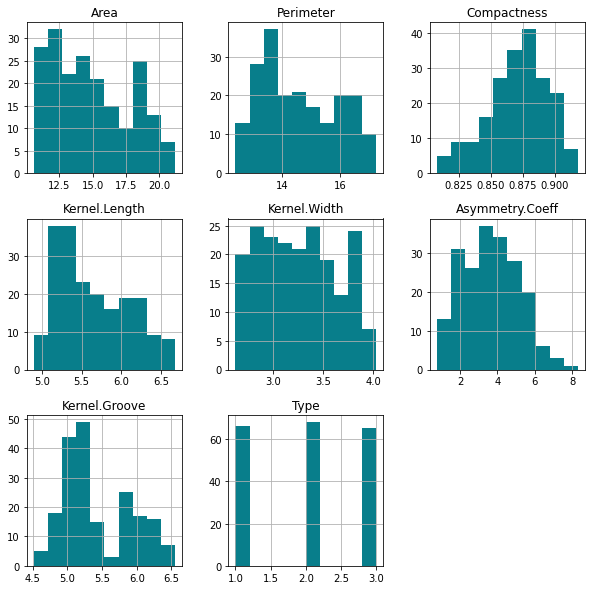

In [318]:
df.hist(figsize=(10,10),color='#087E8B')

#### 1.4. Do the correlational analysis on the dataset.

plot the pair plot between all independent features and dependent features. It will give the relation between dependent and independent features. The relation between the independent feature and the dependent feature is less than 0.2 then choose that independent feature for building a model.

<AxesSubplot:>

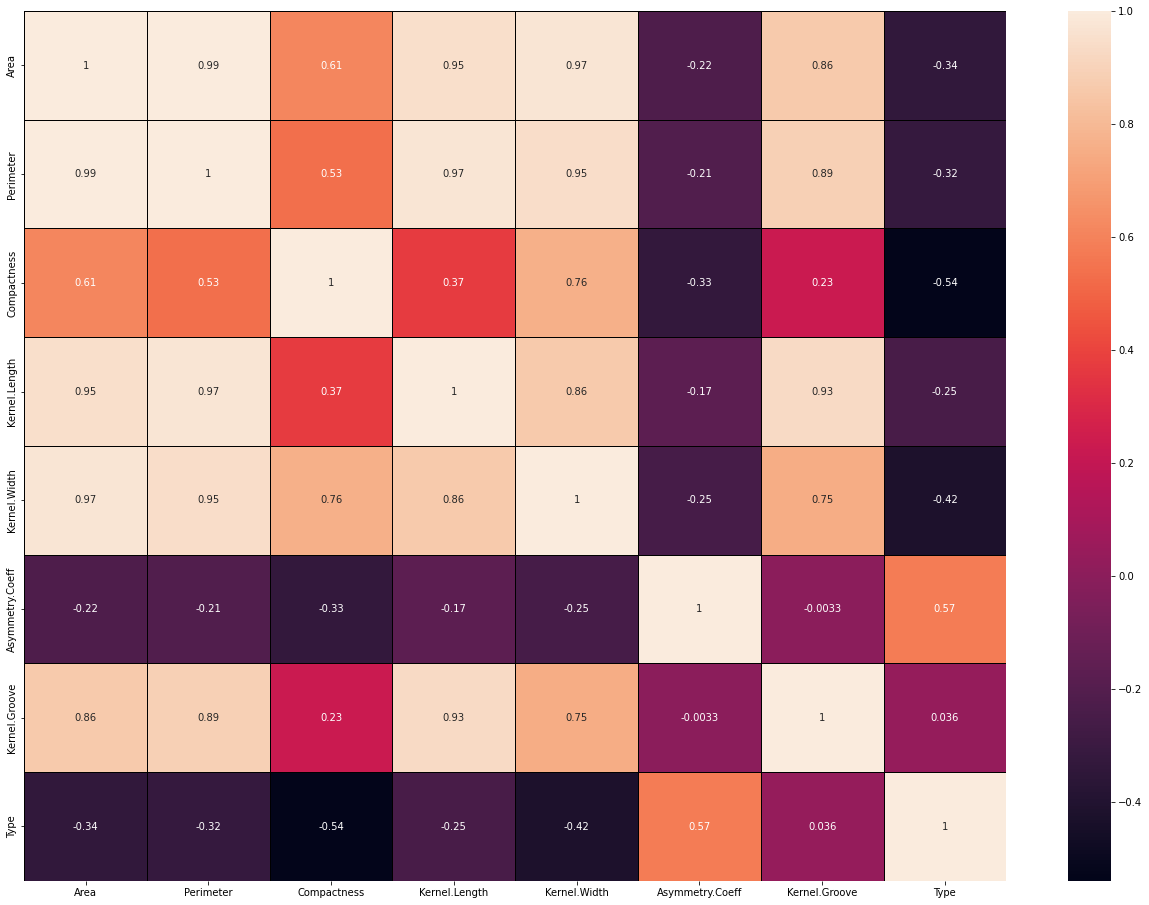

In [319]:
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=1)

In [320]:
df.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


In [321]:
corr_features = set()
corr_matrix = df.corr()
corr_threshold=0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print(corr_features)


{'Kernel.Width', 'Perimeter', 'Kernel.Length', 'Kernel.Groove'}


we have  featurs that are highly corrlealted with each other so we need only one of them

In [322]:
data=df.drop(['Kernel.Width', 'Perimeter', 'Kernel.Length'],axis=1)

In [323]:
data.head(1)

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,0.871,2.221,5.22,1


In [324]:
data.corr()

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.609887,-0.222820,0.862727,-0.340664
Compactness,0.609887,1.000000,-0.329400,0.227016,-0.539261
Asymmetry.Coeff,-0.222820,-0.329400,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.227016,-0.003349,1.000000,0.035508
Type,-0.340664,-0.539261,0.573956,0.035508,1.000000


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'Asymmetry.Coeff'}>,
        <AxesSubplot:title={'center':'Kernel.Groove'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>]],
      dtype=object)

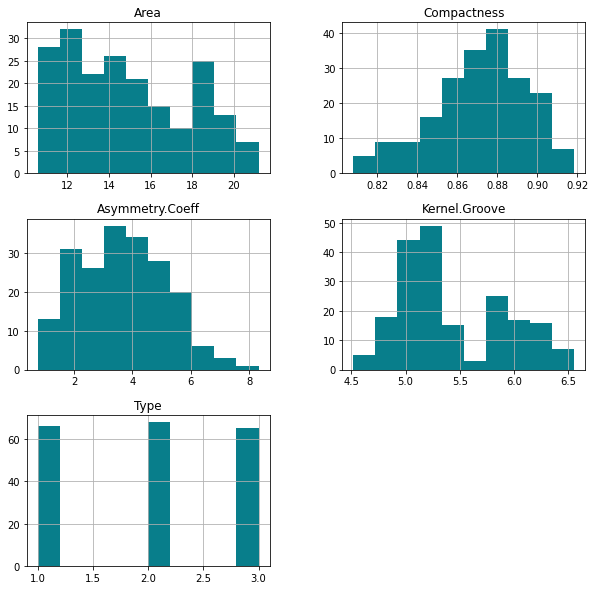

In [325]:
data.hist(figsize=(10,10),color='#087E8B')

# 2. Data Pre-processing and cleaning

#### 2.1. Do the appropriate pre-processing

In [326]:
data.describe()

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,0.870811,3.699217,5.420653,1.994975
std,2.919976,0.023320,1.471102,0.492718,0.813382
min,10.590000,0.808100,0.765100,4.519000,1.000000
25%,12.330000,0.857100,2.570000,5.046000,1.000000
50%,14.430000,0.873400,3.631000,5.228000,2.000000
75%,17.455000,0.886800,4.799000,5.879000,3.000000
max,21.180000,0.918300,8.315000,6.550000,3.000000


chek null valus

In [327]:
data.isnull().sum()

Area               0
Compactness        0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

check outliers

<AxesSubplot:ylabel='Area'>

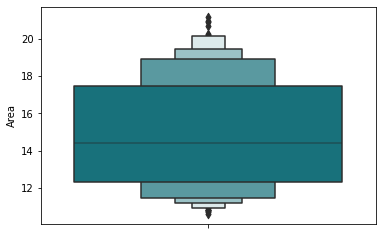

In [328]:
sns.boxenplot(y='Area',data=data,color='#087E8B')

In [329]:
q=data['Area'].quantile(0.98)
print(q)
print(data["Area"].min())
print(data["Area"].max())
print(len(data[data["Area"]>q]))

20.258799999999994
10.59
21.18
4


In [330]:
data.drop(data[data["Area"]>q].index,inplace=True)

<AxesSubplot:ylabel='Compactness'>

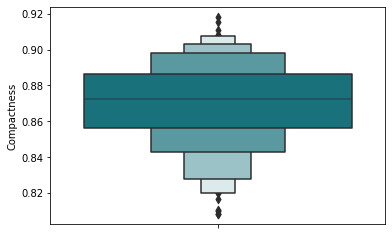

In [331]:
sns.boxenplot(y='Compactness',data=data,color='#087E8B')

In [332]:
quantile1=data['Compactness'].quantile(0.99)
print(quantile1)
print(data["Compactness"].min())
print(data["Compactness"].max())
print(len(data[data["Compactness"]>quantile1]))

0.91107
0.8081
0.9183
2


<AxesSubplot:ylabel='Asymmetry.Coeff'>

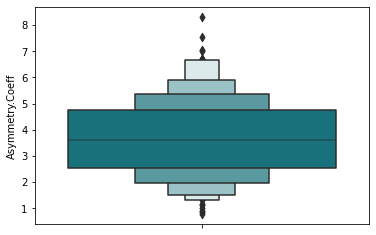

In [333]:
sns.boxenplot(y='Asymmetry.Coeff',data=data,color='#087E8B')

In [334]:
quantile2=data['Asymmetry.Coeff'].quantile(0.97)
print(quantile2)
print(data["Asymmetry.Coeff"].min())
print(data["Asymmetry.Coeff"].max())
print(len(data[data["Asymmetry.Coeff"]>quantile2]))

6.68254
0.7651
8.315
6


In [335]:
data.drop(data[data['Asymmetry.Coeff']>quantile2].index,inplace=True)

<AxesSubplot:ylabel='Kernel.Groove'>

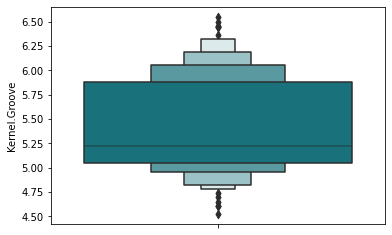

In [336]:
sns.boxenplot(y='Kernel.Groove',data=data,color='#087E8B')

In [337]:
quantile3=data['Kernel.Groove'].quantile(0.97)
print(quantile3)
print(data['Kernel.Groove'].min())
print(data['Kernel.Groove'].max())
print(len(data[data['Kernel.Groove']>quantile3]))

6.33512
4.519
6.55
6


In [338]:
len(data)

189

<AxesSubplot:title={'center':'target'}>

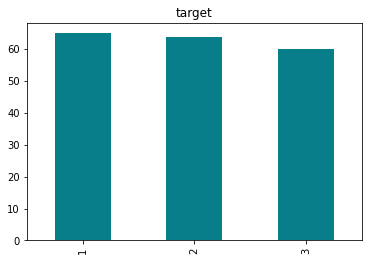

In [339]:
data['Type'].value_counts().plot(kind='bar', title='target',color='#087E8B')

we use SMOTE technique to solve imbalancing and small dataset  

In [340]:
from imblearn.over_sampling import SMOTE 

X=data.drop(["Type"],axis=1)
y=data["Type"]

sm = SMOTE(random_state=42) 
X, y = sm.fit_resample(X, y)



### 2.1 Feature engineering

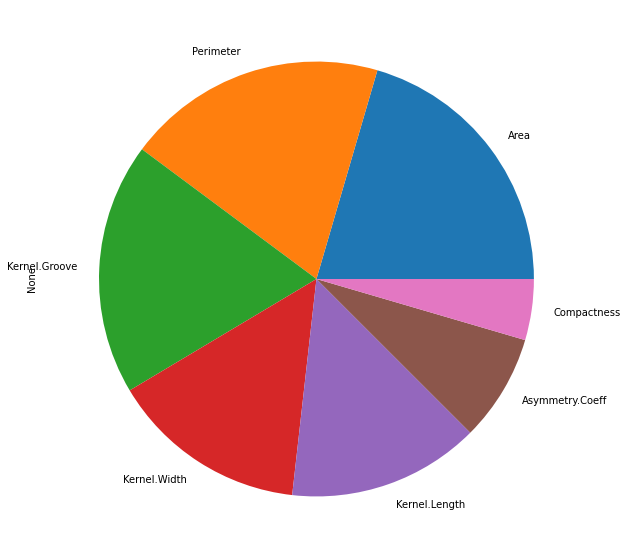

In [341]:
feat = RandomForestClassifier()
X=df.drop(["Type"],axis=1)
y=df["Type"]

feat.fit(X,y)

#Plotting graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(feat.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='pie')
plt.show()

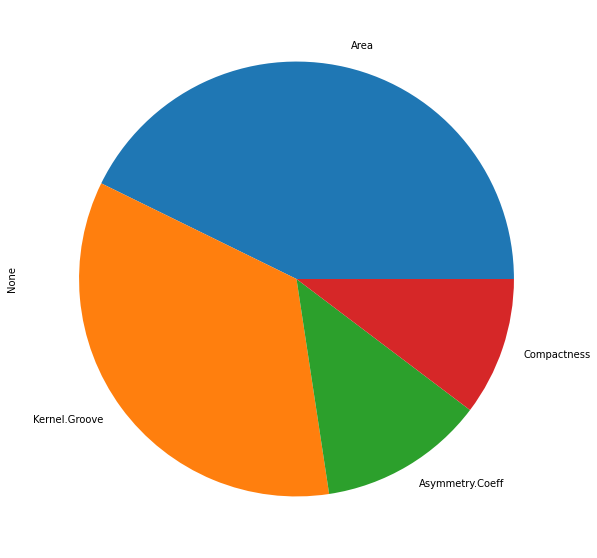

In [342]:

X=data.drop(["Type"],axis=1)
y=data["Type"]


feat = RandomForestClassifier()

feat.fit(X,y)

#Plotting graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(feat.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='pie')
plt.show()

In [343]:
data.describe()

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,14.865079,0.870652,3.560604,5.411169,1.973545
std,2.827886,0.023264,1.347515,0.483549,0.814979
min,10.590000,0.808100,0.765100,4.519000,1.000000
25%,12.360000,0.856700,2.462000,5.046000,1.000000
50%,14.460000,0.872800,3.533000,5.224000,2.000000
75%,17.320000,0.886500,4.670000,5.877000,3.000000
max,20.240000,0.918300,6.682000,6.550000,3.000000


We do normalization because there are columns each one has its own different range of values ​​, which is highly impact on performance of some of algorithms such as KNN and linear regression.

In [344]:
scaler = MinMaxScaler()
data[data.columns[:-1]]=scaler.fit_transform(data[data.columns[:-1]])

# Starting Creating our Models:

#### 3.1 we splt data into training and testing set to prevent our model from overfitting , we also set a random_state so that the results are reproducible, that is every time we run the code, the same instances will be included in the training and testing sets respectively. 

In [345]:


X=data.drop(["Type"],axis=1)
y=data["Type"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)



#### 3.2 we choose n_neighbors=5 because it is odd number but if we choose an even k, there is a risk of a tie in the decision of which class.

accuracy Train:  96.02649006622516
accuracy Test:  92.10526315789474
              precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           2       1.00      1.00      1.00        12
           3       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



<AxesSubplot:>

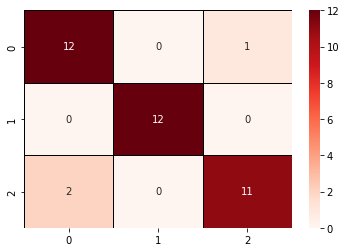

In [346]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)
pred_train_knn=model_knn.predict(X_train)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train_knn)*100))

pred_test_knn=model_knn.predict(X_test)
print("accuracy Test:  "+str(accuracy_score(y_test,pred_test_knn)*100))
print(classification_report(y_test,pred_test_knn))


sns.heatmap(confusion_matrix(y_test,pred_test_knn),annot=True,fmt='g',cmap='Reds'
            ,linecolor='black',linewidths=1)


#### 3.2 the most coomen problem in DecisionTree is overfiting and we chose max_depth=4 because the depth is highly effect on overfitting and underfitting.


In [357]:
modeltree=DecisionTreeClassifier(max_depth=4)
modeltree.fit(X_train,y_train)




DecisionTreeClassifier(max_depth=4)

accuracy Train:  98.67549668874173
accuracy Test:  94.73684210526315
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00        12
           3       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



<AxesSubplot:>

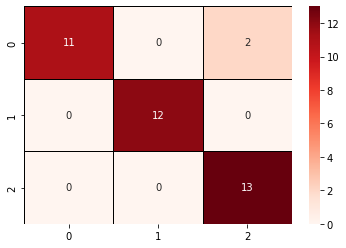

In [358]:

pred_train_tree=modeltree.predict(X_train)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train_tree)*100))

pred_teat_tree=modeltree.predict(X_test)
#pred=(pred>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,pred_teat_tree)*100))
print(classification_report(y_test,pred_teat_tree))


sns.heatmap(confusion_matrix(y_test,pred_teat_tree),annot=True,fmt='g',cmap='Reds'
            ,linecolor='black',linewidths=1)




#### 4.2 as we have seen in tow models that we have build there is an overfitting in each model and we could slove that problem by changes the hyperparameters in each model

accuracy Train:  94.70198675496688
accuracy Test:  92.10526315789474
              precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           2       1.00      1.00      1.00        12
           3       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



<AxesSubplot:>

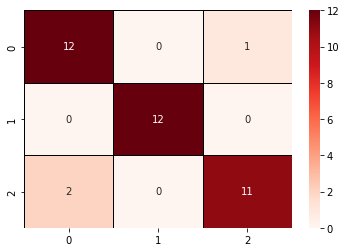

In [349]:
modelknn_1=KNeighborsClassifier(n_neighbors=10)
modelknn_1.fit(X_train,y_train)
pred_train_knn_1=modelknn_1.predict(X_train)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train_knn_1)*100))

pred_teat_knn_1=modelknn_1.predict(X_test)
print("accuracy Test:  "+str(accuracy_score(y_test,pred_teat_knn_1)*100))
print(classification_report(y_test,pred_teat_knn_1))

sns.heatmap(confusion_matrix(y_test,pred_teat_knn_1),annot=True,fmt='g',cmap='Reds'
            ,linecolor='black',linewidths=1)

accuracy Train:  92.71523178807946
accuracy Test:  92.10526315789474
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       1.00      1.00      1.00        12
           3       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



<AxesSubplot:>

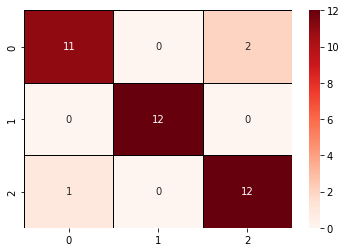

In [350]:
modeltree_1=DecisionTreeClassifier(max_depth=2)
modeltree_1.fit(X_train,y_train)
pred_train_tree_1=modeltree_1.predict(X_train)
print("accuracy Train:  "+str(accuracy_score(y_train,pred_train_tree_1)*100))

pred_teat_tree_1=modeltree_1.predict(X_test)
#pred=(pred>0.5)
print("accuracy Test:  "+str(accuracy_score(y_test,pred_teat_tree_1)*100))
print(classification_report(y_test,pred_teat_tree_1))
sns.heatmap(confusion_matrix(y_test,pred_teat_tree_1),annot=True,fmt='g',cmap='Reds'
            ,linecolor='black',linewidths=1)

#### 4.2 we have changed on hyperparemetrs to avoid overfiting and as we see the diffrence between traing and testing is being very low  ,so depends on the results the best model DecisionTreeClassifier with max_depth=2